# Team Safety

# **Worst Neighborhood in Pittsburgh**

## **Introduction** 

This notebook will analyze data on Pittsburgh arrests, non-traffic citations, and fire incidents to determine which neighborhood is the worst based on each of these metrics respective frequencies.

We decided that we would do the metric for the worst neighborhood in Pittsburgh because the best ones would appear towards the bottoms of all of are lists, and that it would be more beneficial to know which areas pose larger threats to all of the off campus students.

## **Metric**

For a neighborhood to be considered dangerous, it needs to pass the criteria of our metric. The worst neighborhood has the most frequent amount of arrests, showing where the police are most active. The worst neighborhood will also have the most frequent amount of non-traffic citations, and since these are citations and not arrests the culprit could potentially continue to commit these acts. Finally, we take natrual safety into account by showing where the most amount of fires occur, to show people where they are most likely to encounter one. 

## Dataset 1: Lucius Christie

##### **Arrests in Pittsburgh**

**Introduction:** Our project is about finding the least safe neighborhood based on three sub metrics. Our apporach is that the "best" neighborhood is the one with the most overall unsafe statistics. We chose this metric because its an interesting and unique way to look at data. An alternative metric we were thinking about before landing on this idea was landscapes features in each neighborhood in Pittsburgh.


**Submetric:** My submetric is arrests in Pittsburgh, using data set from Pittsburgh Police, **URL:** https://data.wprdc.org/dataset/arrest-data/resource/e03a89dd-134a-4ee8-a2bd-62c40aeebc6f


**Data:** I will be using neighborhoods and number of arrests in each neighborhood to determine "best" neighborhood.|

In [48]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

data = pd.read_csv("arrests.csv", parse_dates=True)

data.head(10)

,_id,PK,CCR,AGE,GENDER,RACE,ARRESTTIME,ARRESTLOCATION,OFFENSES,INCIDENTLOCATION,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
0,1,1975272,16158872,42.0,F,B,2016-08-24T12:20:00,"4700 Block Centre AV Pittsburgh, PA 15213",3929 Retail Theft.,"4700 Block Centre AV Pittsburgh, PA 15213",Bloomfield,5,804.0,8.0,2.0,-79.949277,40.452551
1,2,1974456,16144120,31.0,M,W,2016-08-03T14:55:00,"4200 Block Steubenville PKE Pittsburgh, PA 15205",13(a)(16) Possession of Controlled Substance,"4200 Block Steubenville PKE Pittsburgh, PA 15205",Outside City,OSC,5599.0,NaN,NaN,-80.088018,40.440136
2,3,1974466,16144165,63.0,F,B,2016-08-03T16:45:00,"900 Block Freeport RD Fox Chapel, PA 15238",3929 Retail Theft.,"900 Block Freeport RD Fox Chapel, PA 15238",Westwood,5,2811.0,9.0,2.0,-79.891803,40.486625
3,4,1974550,16145257,25.0,F,W,2016-08-05T02:36:00,"Foreland ST & Cedar AV Pittsburgh, PA 15212",5503 Disorderly Conduct. / 5505 Public Drunken...,"Foreland ST & Cedar AV Pittsburgh, PA 15212",East Allegheny,1,2304.0,1.0,1.0,-80.001939,40.454080
4,5,1974596,16145962,25.0,M,B,2016-08-06T02:00:00,"900 Block Woodlow ST Pittsburgh, PA 15205",2702 Aggravated Assault. / 2705 Recklessy Enda...,"900 Block Woodlow ST Pittsburgh, PA 15205",Crafton Heights,5,2814.0,2.0,5.0,-80.052204,40.445900
5,6,1974556,16144301,45.0,M,W,2016-08-15T13:30:00,"600 Block 1st AV Pittsburgh, PA 15219",3929 Retail Theft.,"800 Block Hazelwood AV Pittsburgh, PA 15217",Greenfield,4,1517.0,5.0,3.0,-79.929238,40.419699
6,7,1974628,16147655,29.0,M,W,2016-08-16T13:00:00,"2300 Block Pioneer AV Pittsburgh, PA 15226",2701 Simple Assault.,"2300 Block Pioneer AV Pittsburgh, PA 15226",Brookline,6,1919.0,4.0,5.0,-80.020357,40.400037
7,8,1974607,16146037,21.0,F,B,2016-08-16T04:25:00,"600 Block 1st AV Pittsburgh, PA 15219",2701 Simple Assault. / 5505 Public Drunkenness...,"700 Block S Braddock AV Pittsburgh, PA 15221",Regent Square,4,1410.0,NaN,NaN,-79.834462,40.398957
8,9,1974643,16132537,17.0,M,B,2016-08-29T17:55:00,"1400 Block Washington BL Pittsburgh, PA 15206",903 Criminal Conspiracy. / 3701 Robbery.,"N Euclid AV & Broad ST Pittsburgh, PA 15206",East Liberty,5,1115.0,NaN,NaN,NaN,NaN
9,10,1974647,16138646,14.0,M,B,2016-08-23T13:36:00,Zone 2,3127 Indecent Exposure. / 3123(a)(6) IDSI with...,Zone 5,NaN,5,NaN,NaN,NaN,NaN,NaN


In [6]:
neighborhood_counts = pd.DataFrame(data['INCIDENTNEIGHBORHOOD'].value_counts())
neighborhood_counts.head(10)

,INCIDENTNEIGHBORHOOD
Central Business District,4440
South Side Flats,3497
Carrick,2351
East Allegheny,2217
Homewood South,2090
Homewood North,1969
East Liberty,1889
Marshall-Shadeland,1516
Bluff,1502
Mount Washington,1434


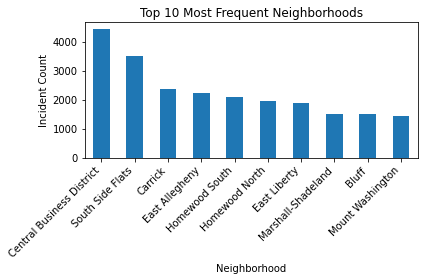

In [7]:
# Define the columns to read
columns_to_read = ['INCIDENTNEIGHBORHOOD']

# Read the data from the CSV file
data = pd.read_csv("arrests.csv", parse_dates=True, usecols=columns_to_read)

# Count the occurrences of each neighborhood
neighborhood_counts = data['INCIDENTNEIGHBORHOOD'].value_counts()

# Sort the neighborhood counts in descending order
neighborhood_counts_sorted = neighborhood_counts.sort_values(ascending=False)

# Select the top 10 most frequent neighborhoods
top_10_neighborhoods = neighborhood_counts_sorted.head(10)

# Plot the counts of the top 10 most frequent neighborhoods
top_10_neighborhoods.plot(kind='bar')
plt.xlabel('Neighborhood')
plt.ylabel('Incident Count')
plt.title('Top 10 Most Frequent Neighborhoods')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent cropping of labels
plt.show()

In [8]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

data = pd.read_csv("arrests.csv", parse_dates=True)
# What are the most popular incidents?
offense_counts = pd.DataFrame(data['OFFENSES'].value_counts().sort_values(ascending=False))
offense_counts.head(15)

,OFFENSES
2701 Simple Assault.,4526
9015 Failure To Appear/Arrest on Attachment Order,3639
9501 Bench Warrant,3524
13(a)(32) Paraphernalia - Use or Possession,1219
"2701(a)(1) Simple Assault - Intent., Know., Reckless.Cause Bod. Injury",1104
13(a)(31) Marijuana: Possession Small Amount,1085
13(a)(16) Possession of Controlled Substance / 13(a)(32) Paraphernalia - Use or Possession,1072
2701 Simple Assault. / 2718(a)(1) Strangulation - Applying Pressure to the Throat or Neck,840
9093 Indirect Criminal Contempt,833
3929 Retail Theft.,828


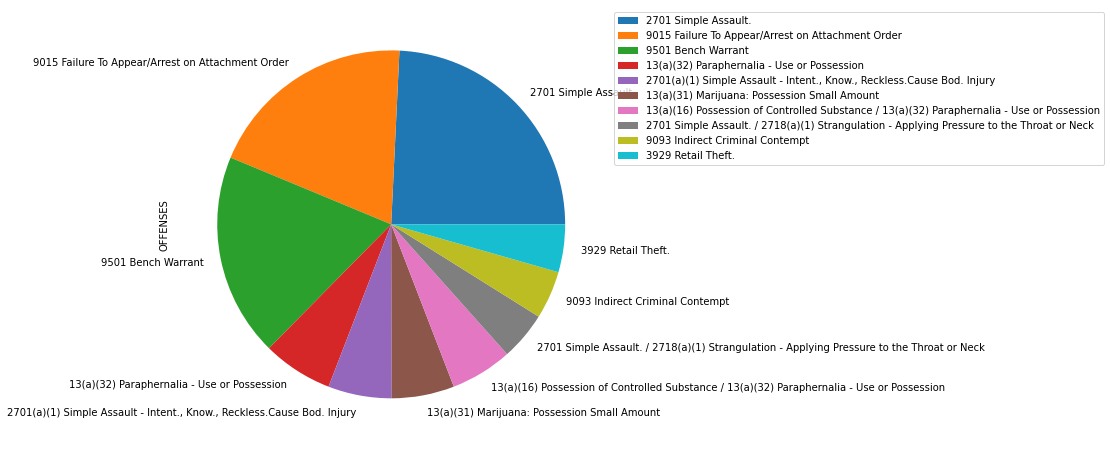

In [9]:
offense_counts.head(10).plot.pie(y='OFFENSES', subplots=False, figsize=(8, 8));
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

In [10]:
import pandas as pd

# Define the offenses you want to track
offenses = ["2701 Simple Assault.", "9015 Failure To Appear/Arrest on Attachment Order", "9501 Bench Warrant", "13(a)(32) Paraphernalia - Use or Possession",
            "2701(a)(1) Simple Assault - Intent., Know., Reckless.Cause Bod. Injury",
            "13(a)(31) Marijuana: Possession Small Amount", "13(a)(16) Possession of Controlled Substance / 13(a)(32) Paraphernalia - Use or Possession",
            "2701 Simple Assault. / 2718(a)(1) Strangulation - Applying Pressure to the Throat or Neck", "9093 Indirect Criminal Contempt", "3929 Retail Theft."]

# Initialize an empty DataFrame with neighborhoods as index and offenses as columns
offenses_df = pd.DataFrame(index=neighborhood_counts.index.values, columns=offenses)

# Fill the DataFrame with zeros
offenses_df = offenses_df.fillna(0)

# Iterate over the rows of the police data
for row in range(len(data)):
    neighborhood = data.at[row, 'INCIDENTNEIGHBORHOOD']
    offense = data.at[row, 'OFFENSES']
    if neighborhood in offenses_df.index:
        if offense in offenses:
            offenses_df.at[neighborhood, offense] += 1

# Display the first few rows of the DataFrame
offenses_df.head(10)

,2701 Simple Assault.,9015 Failure To Appear/Arrest on Attachment Order,9501 Bench Warrant,13(a)(32) Paraphernalia - Use or Possession,"2701(a)(1) Simple Assault - Intent., Know., Reckless.Cause Bod. Injury",13(a)(31) Marijuana: Possession Small Amount,13(a)(16) Possession of Controlled Substance / 13(a)(32) Paraphernalia - Use or Possession,2701 Simple Assault. / 2718(a)(1) Strangulation - Applying Pressure to the Throat or Neck,9093 Indirect Criminal Contempt,3929 Retail Theft.
Central Business District,213,319,313,81,55,40,62,20,27,106
South Side Flats,146,170,159,22,42,73,30,24,14,53
Carrick,215,133,144,41,49,49,54,41,42,16
East Allegheny,64,209,153,98,9,27,100,10,11,51
Homewood South,112,146,118,82,22,45,56,24,13,1
Homewood North,132,115,108,42,24,52,31,24,21,4
East Liberty,107,110,79,7,21,29,11,9,27,220
Marshall-Shadeland,131,66,60,23,33,21,28,38,30,14
Bluff,52,135,118,104,12,15,71,5,1,3
Mount Washington,138,55,66,12,26,16,15,26,21,2


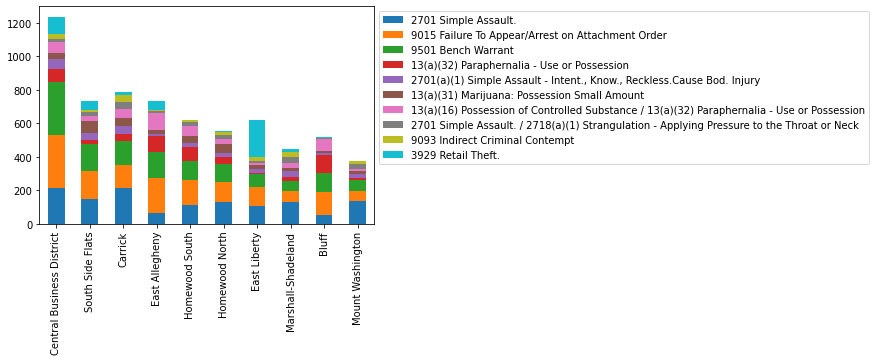

In [11]:
# Stacked bar graph visualization of most UNsafe neighborhoods
offenses_df.head(10).plot.bar(stacked=True)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# **The Worst Neighborhood in Pittsburgh:**
based on all the data that I have collected, the Central Business District is the worst neighborhood in Pittsburgh, it has the most overall arrests and has a great variety of arrests

# Conclusion:
I don't live in Pittsburgh so I don't know many of the niehgborhoods but, my personal worst neighborhood in Pittsburgh is Shadyside. Buses barely go into the main street, and the surrounding houses are run down. Looks suspicious to me, but according to my data Central Business District is the worst. 

## Dataset 2: Gabriel Peralta

##### Non-Traffic Citations

## **Introduction**
Our project is to find the most dangerous neighborhood based on the frequency of the citations that are not arrested. Since we are living in a college that is in a city, it is important to understand what neighborhoods could potentially pose the most dangerous threats after a night on the town, or possibly which neighborhoods to avoid since the more frequently a citation appears the more likely an officer is there to hand one out.

## **Metric** 
For my metric, I am going through the data on non traffic citations that have been given our in the area. My goal is to figure out the top neighborhoods where these citations occur and what the most frequent type of citation is.

In [59]:
import pandas as pd 
import geopandas
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [65]:
citations = pd.read_csv("Citations.csv")
plt.style.use('seaborn')

First I imported the data on Non-traffic citations that were given in Pittsburgh neighborhoods. To begin with, we will analyze what the most common crime is, and then cross reference it with how many crimes occur in the neighborhood itself

![Jake Peralta](https://media.giphy.com/media/v1.Y2lkPTc5MGI3NjExb2ExenRkbmFtbmh5ZHFrN3k2enFnNHY1YnR1Z3NpODIyZjFndmR2OCZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/3oz8xIMEw77MXphEtO/giphy.gif)

In [66]:
citations.head(10)

,_id,PK,CCR,GENDER,RACE,AGE,CITEDTIME,INCIDENTLOCATION,OFFENSES,NEIGHBORHOOD,ZONE,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
0,1,1078081,16157849,M,B,29.0,2016-08-22T23:45:00,"200 Block N DITHRIDGE ST PITTSBURGH, PA",5503(a)(2) DISORDERLY CONDUCT - UNREASONABLE N...,North Oakland,4,507,8.0,3.0,-79.951692,40.449311
1,2,1078082,16157849,M,W,21.0,2016-08-22T23:45:00,"200 Block N DITHRIDGE ST PITTSBURGH, PA",5503(a)(2) DISORDERLY CONDUCT - UNREASONABLE N...,North Oakland,4,507,8.0,3.0,-79.951692,40.449311
2,3,1078083,16159579,NaN,NaN,NaN,2016-08-25T11:10:00,"NORTH PARK PITTSBURGH, PA",5505 Public Drunkenness,Allegheny Center,1,2204,NaN,NaN,NaN,NaN
3,4,1078084,16159780,M,B,22.0,2016-08-25T16:42:00,"7200 Block FRANKSTOWN AV PITTSBURGH, PA","6501(a)(1) Scattering Rubbish; Any waste, dang...",Homewood South,5,1303,9.0,2.0,-79.896254,40.457329
4,5,1078085,16161591,F,W,22.0,2016-08-28T00:58:00,"6100 Block BERLIN WY PITTSBURGH, PA",5503(a)(2) DISORDERLY CONDUCT - UNREASONABLE N...,Upper Lawrenceville,2,1011,7.0,2.0,-79.946664,40.485403
5,6,1078086,16162400,M,W,28.0,2016-08-29T10:34:00,"MARKET ST & 5TH AV PITTSBURGH, PA","5507(a) Obstructing highway, railroad or publi...",Golden Triangle/Civic Arena,2,201,6.0,6.0,-80.002109,40.441383
6,7,1078087,16162524,M,B,56.0,2016-08-29T13:00:00,"MARKET ST & FORBES AV PITTSBURGH, PA",601.08 (a) Open Container Law,Golden Triangle/Civic Arena,1,201,6.0,6.0,-80.002190,40.440584
7,8,1078088,16162524,M,W,44.0,2016-08-29T13:00:00,"MARKET ST & FORBES AV PITTSBURGH, PA",601.08 (a) Open Container Law,Golden Triangle/Civic Arena,1,201,6.0,6.0,-80.002190,40.440584
8,9,1078089,16083638,M,W,50.0,2016-05-07T16:30:00,"40TH ST & DAVISON ST PITTSBURGH, PA",5505 Public Drunkenness,Lower Lawrenceville,2,603,7.0,2.0,-79.960903,40.467585
9,10,1078090,16077700,M,B,24.0,2016-04-29T01:05:00,"80 Block S 15TH ST PITTSBURGH, PA",3304(a)(5) CRIMINAL MISCHIEF - Intentionally D...,South Side Flats,3,1702,3.0,3.0,-79.983573,40.428555


Here we can see that there is a lot of data to sift through, so lets simplify it by grabbing only what we need

In [67]:
#first I created a variable that reads the CSV
data_offense = pd.read_csv("Citations.csv")

#then defined which column I want to be read
column_offense = ["OFFENSES"]

#Finally, I counted ther amount of offenses and how often they occured
counts_offense = data_offense[column_offense].value_counts().reset_index()

counts_offense.columns = ["Offense", "# of Offenses"]

top_10_offenses = counts_offense.head(10)

print("Top 10 Offenses Committed")
print(top_10_offenses)

Top 10 Offenses Committed
                                             Offense  # of Offenses
0                            5505 Public Drunkenness           3162
1  2709(a)(1) Harassment by Physical Contact, or ...           1561
2  5503(a)(1) DISORDERLY CONDUCT - ENGAGE IN FIGH...           1340
3  627.02(b)(i) Possessing a small amount of mari...           1329
4  601.16(b)(1)(a) Any Person who urinates or def...           1319
5  5503(a)(4) DISORDERLY CONDUCT - HAZARDOUS/PHYS...            700
6  5503(a)(2) DISORDERLY CONDUCT - UNREASONABLE N...            685
7  601.08(a) Alcohol or Liquor Consumption on Str...            558
8  3304(a)(5) CRIMINAL MISCHIEF - Intentionally D...            515
9  6308(a) Underage Purchase, Consume, Possessed ...            427


Next we can then graph this out so that it is easier to see proportionally how much the offense has been committed

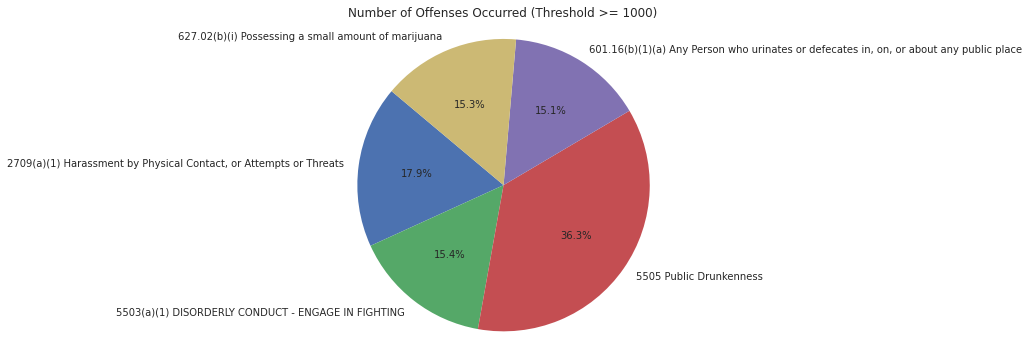

In [68]:
#first I created a function that will filter out the crimes that have occured less than 1000 times
def filter_offenses(x, threshold): 
    return (x["NEIGHBORHOOD"].count() >= threshold)

#then I used the custom function to filter out the rows and see how the data compares to each other
crime_rate = citations.groupby("OFFENSES").filter(filter_offenses, threshold=1000)

offense_count = crime_rate.groupby("OFFENSES").size()

plt.figure(figsize=(10, 6))
offense_count.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.ylabel('')  
plt.title('Number of Offenses Occurred (Threshold >= 1000)')
plt.axis('equal')  
plt.show()

Here we can see that the most common offense that occurs in Pittsburgh neighborhoods is Public Drunkness (what a surprise on a college town campus huh), but looking at the next four most common offenses we can see how they are evenly split across the board with their occurence. With this in mind, we can now look at the neighborhoods themselves and the amount of offenses that occur in them, these five will be more likely to appear because of their frequency

![Drunk](https://media.giphy.com/media/v1.Y2lkPTc5MGI3NjExcjN5NXJ1Y2NkZmdwbDRpemx0ZjBzaDQ1ODdqYWdjdGNmaDQ4cWhpbCZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/l0Iy8G3PwyahZST2E/giphy.gif)

In [69]:
#Using the same structure from earlier we can create the same list for neighborhoods
data_neighborhood = pd.read_csv("Citations.csv")

column_neighborhood = ["NEIGHBORHOOD"]

counts_neighborhood = data_neighborhood[column_neighborhood].value_counts().reset_index()

counts_neighborhood.columns = ["Neighborhood", "Frequency"]

top_10_neighborhood = counts_neighborhood.head(10)

print("Top 10 Neighborhoods Where Offenses are Committed")
print(top_10_neighborhood)

Top 10 Neighborhoods Where Offenses are Committed
                Neighborhood  Frequency
0           South Side Flats       3453
1  Central Business District       2027
2            Central Oakland        665
3                North Shore        577
4                    Carrick        456
5             East Allegheny        360
6           Mount Washington        329
7                  Brookline        310
8                  Shadyside        304
9                  Hazelwood        285


Again, lets take this data and place it into a graph

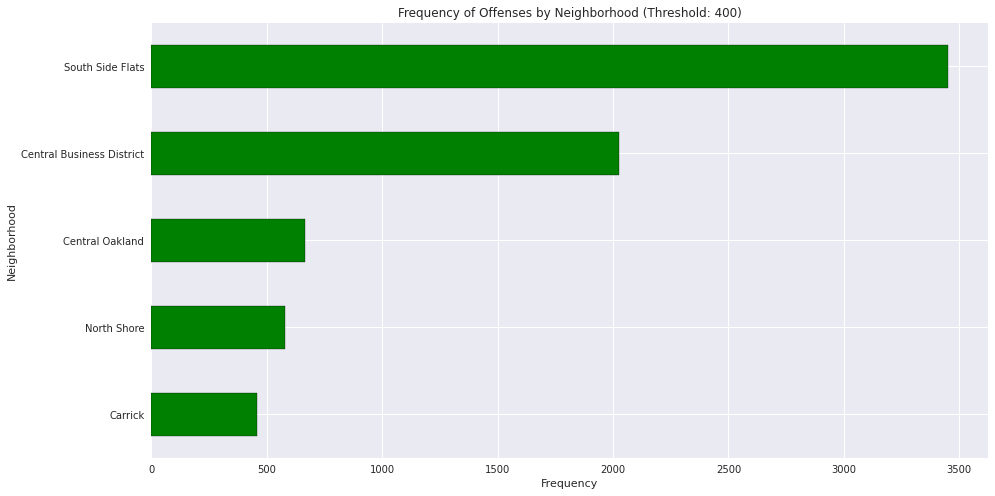

In [70]:
#First we create a threshold to filter out neighborhoods that have been mentioned less than 400 times
threshold = 400

#Then we count the frequency of how many times a neighborhood appears
neighborhood_freq = citations['NEIGHBORHOOD'].value_counts()
neighborhood_freq_filtered = neighborhood_freq[neighborhood_freq >= threshold]
neighborhood_freq_sorted = neighborhood_freq_filtered.sort_values()

neighborhood_freq_sorted.plot(kind='barh',color = 'green', edgecolor = 'black',figsize=(15, 8))
plt.xlabel('Frequency')
plt.ylabel('Neighborhood')
plt.title('Frequency of Offenses by Neighborhood (Threshold: 400)')
plt.show()


Here we can see the true scope of what neighborhood dominates the non traffic citations leaderboard, and it looks like South Side Flats takes it all. I guess having a neighborhood dedicated to bars and clubs makes it easier for officers to hand out citations. 

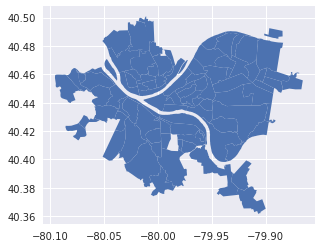

In [34]:
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp") 
neighborhoods.plot() 

Next, I wanted to create a better visual of how all the neighborhoods compare to each other using a map

In [35]:
#Since the data of offenses is not explicitly numbers we have to filter and merge the data so that 
#the citations are filtered by size instead of their name
citations_fltrd = citations.groupby("NEIGHBORHOOD").size().reset_index(name='OFFENSES')
offense_map = neighborhoods.merge(citations_fltrd, how='left', left_on='hood', right_on='NEIGHBORHOOD')

offense_map[['hood','OFFENSES','geometry']].head()

,hood,OFFENSES,geometry
0,Central Oakland,665.0,"POLYGON ((-79.95304 40.44203, -79.95302 40.442..."
1,North Oakland,199.0,"POLYGON ((-79.95455 40.45882, -79.95427 40.458..."
2,West Oakland,63.0,"POLYGON ((-79.96230 40.44294, -79.96220 40.442..."
3,Crawford-Roberts,102.0,"POLYGON ((-79.98275 40.44641, -79.98273 40.446..."
4,Strip District,101.0,"POLYGON ((-79.97494 40.45629, -79.97484 40.456..."


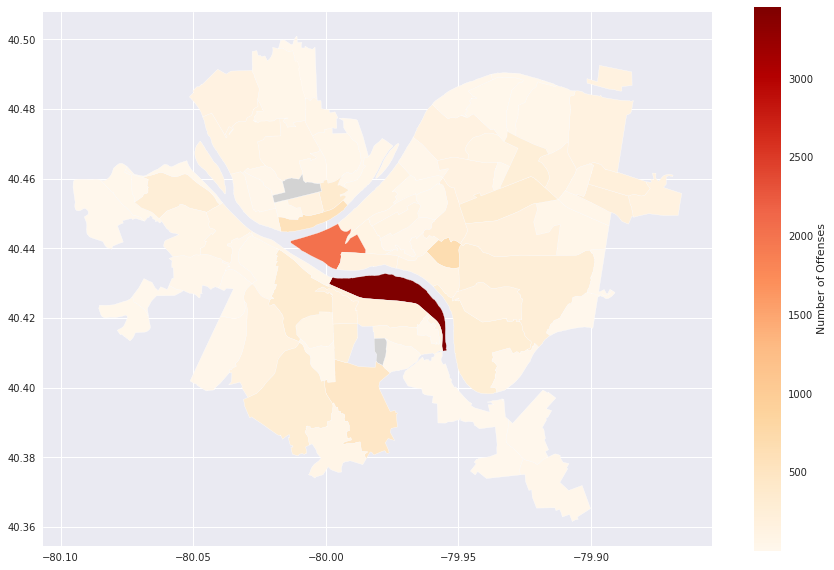

In [36]:
offense_map.plot(column='OFFENSES', 
                 cmap='OrRd', 
                 edgecolor="white", 
                 legend=True, 
                 legend_kwds={'label': "Number of Offenses"},
                 figsize=(15, 10), 
                 missing_kwds={"color": "lightgrey"}
                )

## The Worst Neighborhood
All things considered, we can see that the most dangerous neighborhood based on non traffic citations can be attributed to South Side Flats. Considering it is home to a lot of popular bars and clubs, there is no surprise that the amount of police activity would need to be increased on weekends, to ensure the safety of others. We can also conclude that public drunkness is the most common citation that occurs in all of the Pittsburgh area. So if you want to do yourself a favor and stay sober, stay away from South Side Flats.

![Bar](https://media.giphy.com/media/v1.Y2lkPTc5MGI3NjExZHZxZXh4YWU0NHhlbTZ6aGI1MnllMWFoNzYzbzM3NXUzbHo2OTZvOCZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/3oz8xTawWVM7Npb1FS/giphy.gif)

## Conclusion
My favorite neighborhood I've been to is Squirrel Hill. The amount of local restaurants, greenery, and overall accessability makes it easy to love. Comparing it to South Side Flats is like comparing the moon and the sun. They both exist for different purposes yet both fulfill them when they are needed. If you want a good local bite with a wide range of flavors, check out some of the restaurants in Squirrel Hill such as Cafe 33 or Prantl's Bakery. If you want to have some fun with your friends, go out to Enclave and have the time of your life. Just be careful around the area because there's bound to be some public drunkess on the weekends.

# **Dataset 3: Julius Clyburn**

#### Fire Incidents in Pittsburgh

**Introduction**

This is an analysis of the fire incidents in neighborhoods in Pittsburgh. The data set being analized is a record of all the times there were fires reported in Pittsburgh. I will be grouping the data by different categories with scales of safety. More fires will count towards a less safe neighborhood.  

My Submetric uses this data set:
https://data.wprdc.org/dataset/fire-incidents-in-city-of-pittsburgh/resource/8d76ac6b-5ae8-4428-82a4-043130d17b02

In [1]:
#Importing all of the function librarys.
import pandas as pd 
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
#Defining and printing the first 10 rows of the data set
DataSet = pd.read_csv("FireIncidents.csv", sep = ",")

DataSet.head(10)

,_id,call_no,incident_type,type_description,address,alarms,alarm_time,primary_unit,census_tract,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,1,F160029985,111.0,Building fire,"800 BLOCK CENTER ST, WILKINSBURG PA 15221",1,2016-04-21T05:01:04,231EN16,NaN,NaN,NaN,NaN,4.200356e+10,NaN,NaN,NaN,3-16,40.441275,-79.882485
1,2,F180022058,111.0,Building fire,"1100 BLOCK JANE ST, WILKINSBURG PA 15221",1,2018-03-13T08:34:43,231EN16,NaN,NaN,NaN,NaN,4.200356e+10,NaN,NaN,NaN,3-21,40.436342,-79.881003
2,3,F180022102,131.0,Passenger vehicle fire,"SB STATE HWY 28 SB AT 31S, PITTSBURGH PA 15212",0,2018-03-13T11:54:23,231EN32,2406.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1-1A,NaN,NaN
3,4,F170043431,131.0,Passenger vehicle fire,"1700 BLOCK BELLEAU DR, PITTSBURGH PA 15212",0,2017-05-31T08:39:47,231EN38,2509.0,Fineview,6.0,25.0,4.200325e+10,1.0,25.0,1.0,1-10,40.460303,-80.006980
4,5,F180021111,111.0,Building fire,"2400 BLOCK VILLAGE RD, PITTSBURGH PA 15205",1,2018-03-09T10:26:42,231EN31,2808.0,Fairywood,2.0,28.0,4.200356e+10,5.0,28.0,6.0,1-16,40.449009,-80.076607
5,6,F180021782,150.0,"Outside rubbish fire, Other","S 7TH ST & E CARSON ST, PITTSBURGH PA 15203",0,2018-03-12T09:13:28,231EN24,1702.0,South Side Flats,3.0,17.0,4.200317e+10,4.0,17.0,3.0,4-2,40.428618,-79.992239
6,7,F180022495,113.0,"Cooking fire, confined to container","200 BLOCK E OHIO ST, PITTSBURGH PA 15212",1,2018-03-14T19:46:10,231EN32,2204.0,Allegheny Center,1.0,22.0,4.200356e+10,1.0,22.0,1.0,1-6,40.453022,-80.003660
7,8,F180022546,111.0,Building fire,"7000 BLOCK LEMINGTON AVE, PITTSBURGH PA 15206",1,2018-03-14T23:49:22,231EN15,1203.0,Lincoln-Lemington-Belmar,9.0,12.0,4.200312e+10,2.0,12.0,5.0,3-18,40.471358,-79.898240
8,9,F180022773,111.0,Building fire,"100 BLOCK SPENCER AVE, PITTSBURGH PA 15227",1,2018-03-15T20:39:05,231EN23,2904.0,Carrick,4.0,29.0,4.200329e+10,4.0,29.0,3.0,4-15,40.385494,-79.977200
9,10,F170044316,131.0,Passenger vehicle fire,"1200 BLOCK WESTFIELD ST, PITTSBURGH PA 15216",0,2017-06-03T01:31:13,231EN28,1916.0,Beechview,4.0,19.0,4.200319e+10,5.0,19.0,6.0,4-28,40.415219,-80.019516


This is a glimpse at the data set but it has too many rows to print. There are unnecessary columns as well which will be cut out of the data because they are not crucial.

In [13]:
#Specifying two elements of the data set
DataSet.loc[:,["neighborhood", "type_description"]]

,neighborhood,type_description
0,NaN,Building fire
1,NaN,Building fire
2,NaN,Passenger vehicle fire
3,Fineview,Passenger vehicle fire
4,Fairywood,Building fire
...,...,...
9774,Beechview,"Outside rubbish fire, Other"
9775,NaN,Building fire
9776,Shadyside,Dumpster or other outside trash receptacle fire
9777,South Side Flats,"Outside rubbish fire, Other"


I will be focusing on the "neighborhood" column. I chose this one because each neighborhood's safety is what what we want to measure. I will also be looking at the "type_description" column to determine the severity of each fire. There are a total of almost 10000 reported fires that need to be organized.

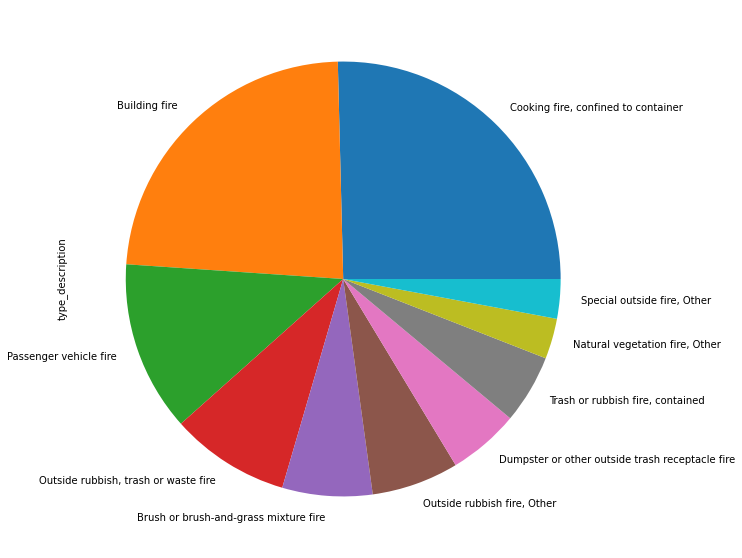

In [14]:
#Establishing a data frame and counting up the occurences within that data frame
fire_type_totals = DataSet['type_description'].value_counts()

#Plotting a pie chart defining its size and domain(the first 10 rows of fire types)
fire_type_totals.head(10).plot.pie(y='type_description',figsize=(10, 10))

Of the different types of fires graphed above it is clear to see the most common are building fires and cookies fires, confined to a container. In my opinion, it would be pretty obvious that most fires contained could be put out far easier than a building fire. Seven of the ten categories are outdoor fires and I think an actual forest fire or anything of the sort would be very unlikely in Pittsburgh. The most severe of these fires in terms of neighborhood safety are passenger vehicle fires and building fires.

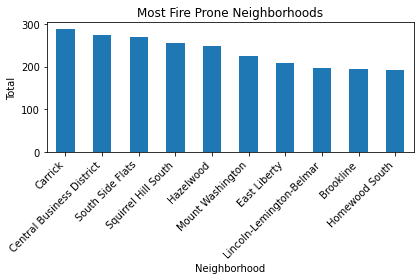

In [7]:
#Establishing a data frame and counting up the occurences within that data frame
neighborhood_totals = DataSet['neighborhood'].value_counts()

#Making the data descend rather than ascend from left to right
neighborhood_total_grouped = neighborhood_totals.sort_values(ascending = False)

#Establishing a variable for the data frame's first ten rows
top_10_fires_by_neighborhood = neighborhood_total_grouped.head(10)

#Creating the graph's display and labels
top_10_fires_by_neighborhood.plot(kind = 'bar')
plt.xlabel('Neighborhood')
plt.ylabel('Total')
plt.title('Most Fire Prone Neighborhoods')
plt.xticks(rotation = 45, ha = 'right')
plt.tight_layout()
plt.show()

This shows that it within a margin of about 100 for each of the top 10 in a gradient nature. Carrick, C.B.D., and the South Side Flats are the top 3 most fire prone neighborhoods.

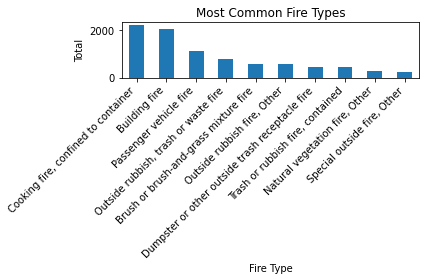

In [9]:
#Establishing a data frame and counting up the occurences within that data frame
fire_type_totals = DataSet['type_description'].value_counts()

#Making the data descend rather than ascend from left to right
fire_type_total_grouped = fire_type_totals.sort_values(ascending = False)

#Establishing a variable for the data frame's first ten rows
top_10_fire_types = fire_type_total_grouped.head(10)

#Creating the graph's display and labels
top_10_fire_types.plot(kind = 'bar')
plt.xlabel('Fire Type')
plt.ylabel('Total')
plt.title('Most Common Fire Types')
plt.xticks(rotation = 45, ha = 'right')
plt.tight_layout()
plt.show()

Cooking fires and building fires are a lot more common than every other type of fire. This is interesting because it means police recieve the most fire reports about less severe fires.

**Conclusion**

A lot of the data was inconclusive without using complicated strategies of analization. My prediction of safest neighborhood was the Strip District. I have been and there a lot of buildings going under renovation. It is also rather small and during christmas time there were lights up everywhere. The Strip District is without a doubt not the least safe neighborhood. That would go to suburban Carrick for my submetric of fires.

# Conclusion

In conclusion, we decided that our worst neighborhood was South Side flats because it has the most amount of non traffic citations, ranks second for arrests and is tied for second in fire incidents. All in all the three that showed up the most were South Side Flats, Central Business District, and Carrick for the most dangerous neighborhoods in Pittsburgh